In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Path to dataset files: /Users/nikodemkaczmarek/.cache/kagglehub/datasets/redwankarimsony/heart-disease-data/versions/6


In [29]:
import pandas as pd


df = pd.read_csv('datasets/heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


## Data analysis

In [30]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [31]:
df.count()

id          920
age         920
sex         920
dataset     920
cp          920
trestbps    861
chol        890
fbs         830
restecg     918
thalch      865
exang       865
oldpeak     858
slope       611
ca          309
thal        434
num         920
dtype: int64

In [32]:
df.isna().any()

id          False
age         False
sex         False
dataset     False
cp          False
trestbps     True
chol         True
fbs          True
restecg      True
thalch       True
exang        True
oldpeak      True
slope        True
ca           True
thal         True
num         False
dtype: bool

In [33]:
(df['thalch'] == 0).any()

np.False_

In [34]:
(df['trestbps'] == 0).any()

np.True_

In [35]:
(df['chol'] == 0).any()

np.True_

In [36]:
df[df['oldpeak'] <= 0][['oldpeak', 'dataset']]

,oldpeak,dataset
13,0.0,Cleveland
26,0.0,Cleveland
32,0.0,Cleveland
35,0.0,Cleveland
44,0.0,Cleveland
...,...,...
913,0.0,VA Long Beach
914,0.0,VA Long Beach
915,0.0,VA Long Beach
917,0.0,VA Long Beach


## Replace incorrect values with NaN

In [37]:
import numpy as np


df.loc[df['trestbps'] == 0, 'trestbps'] = np.nan
df.loc[df['chol'] == 0, 'chol'] = np.nan

In [38]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,860.000000,718.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.286047,246.832869,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,18.536175,58.527062,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,210.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,239.500000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,276.750000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## Remove unnecessary columns

In [39]:
df = df.drop(columns=['id', 'dataset'])

In [42]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  860 non-null    float64
 4   chol      718 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


## Graphs

<Axes: >

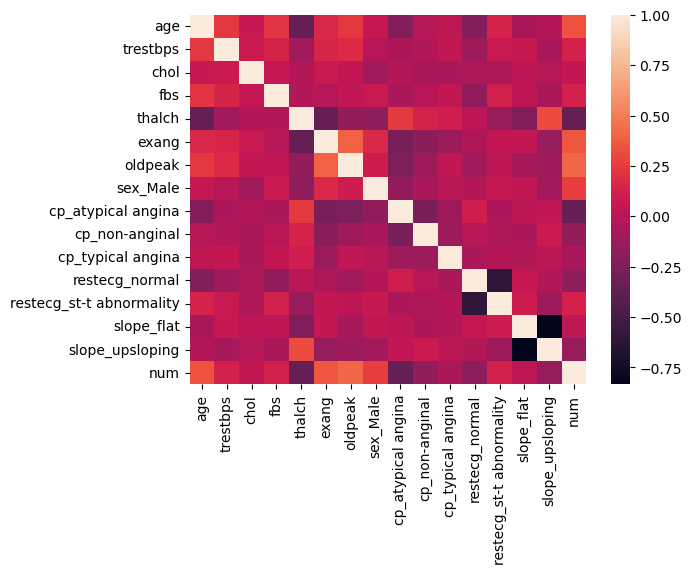

In [5]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('../../data/heart_Xy_scaled.csv')

sns.heatmap(df.corr())

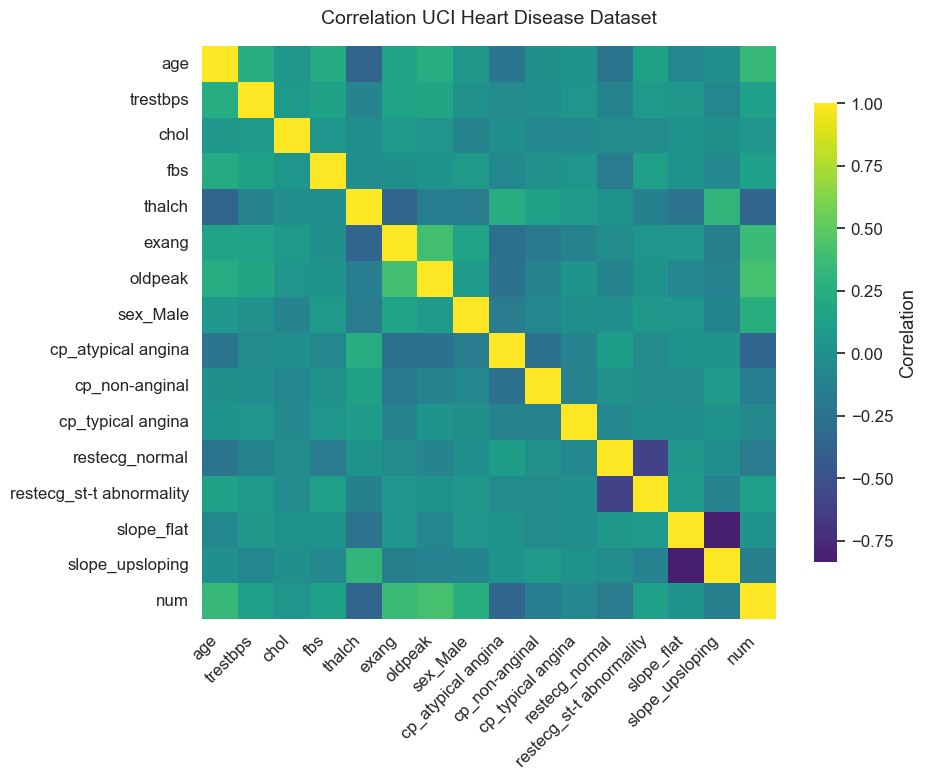

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('../../data/heart_Xy_scaled.csv')

# Compute correlation matrix
corr = df.corr()

# Set general style
sns.set_theme(style="white", font_scale=1.1)

# Create figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(
    corr,
    cmap="viridis",          
    square=True,              # make cells square
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    center=0,                 # center around 0
)

# Add title
plt.title("Correlation UCI Heart Disease Dataset", fontsize=14, pad=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
